<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


For all visualizations, please include a title in each graph and appropriate labels

# Median value of owner-occupied homes

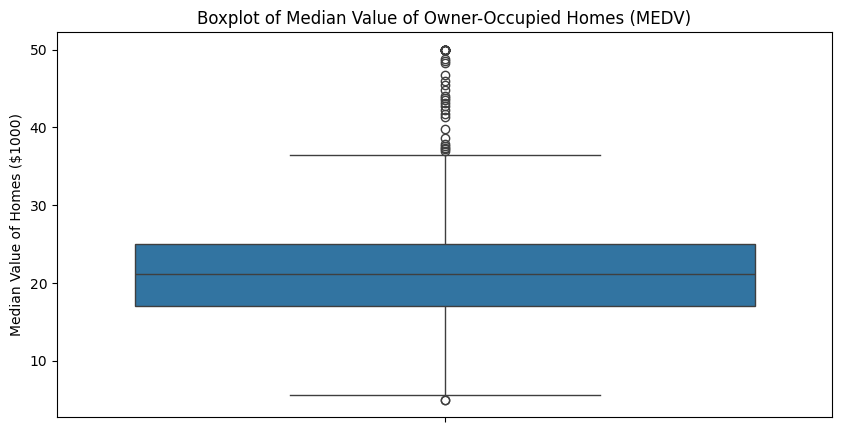

In [11]:
# Create a boxplot for the 'MEDV' column
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('Median Value of Homes ($1000)')
pyplot.show()

The median of the value of owner-occupied homes is about 21.

#  Charles river 

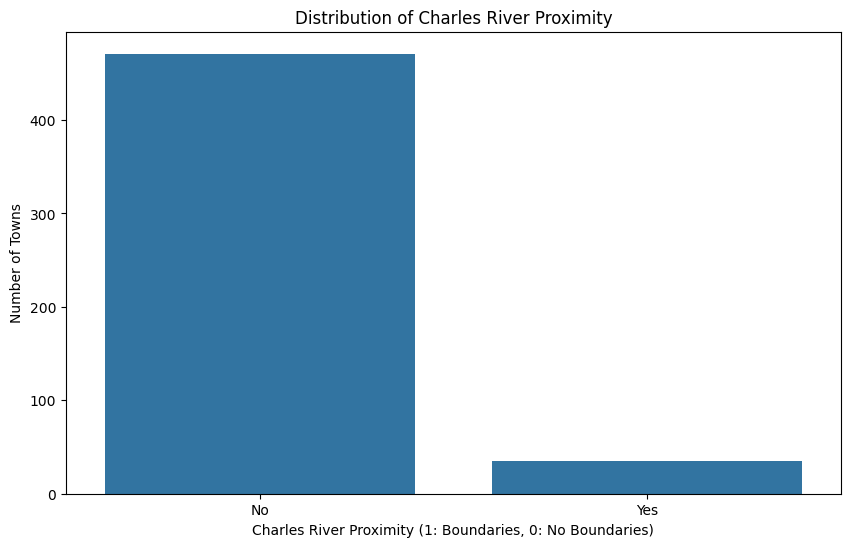

In [12]:
# Count the occurrences of each value in the 'CHAS' column
chas_counts = boston_df['CHAS'].value_counts().reset_index()
chas_counts.columns = ['CHAS', 'Count']

# Create a bar plot
pyplot.figure(figsize=(10, 6))
sns.barplot(x='CHAS', y='Count', data=chas_counts)
pyplot.title('Distribution of Charles River Proximity')
pyplot.xlabel('Charles River Proximity (1: Boundaries, 0: No Boundaries)')
pyplot.ylabel('Number of Towns')
pyplot.xticks(ticks=[0, 1], labels=['No', 'Yes'])
pyplot.show()


Mostly no boundaries to Charles River

# MEDV variable vs the AGE variable.

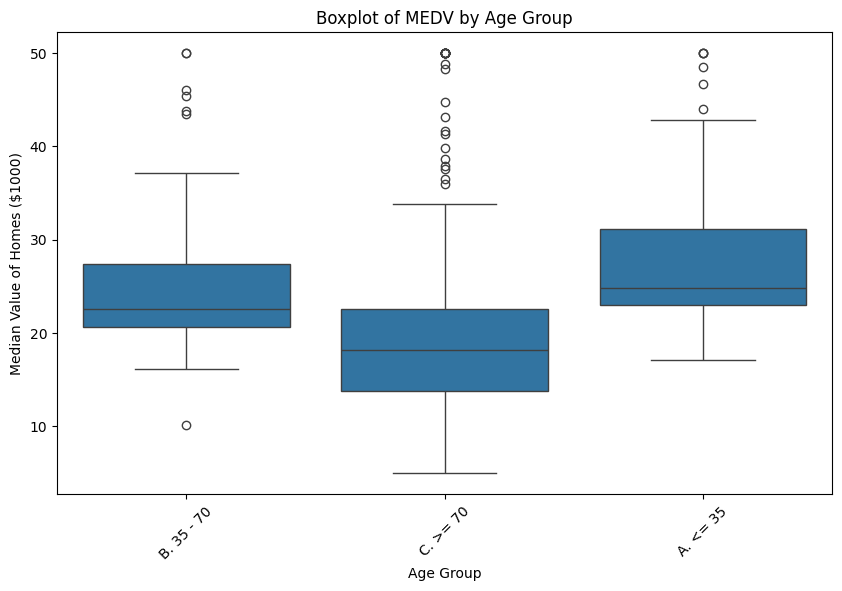

In [14]:
# Discretize the AGE variable into three groups
def categorize_age(age):
    if age <= 35:
        return 'A. <= 35'
    elif 35 < age <= 70:
        return 'B. 35 - 70'
    else:
        return 'C. >= 70'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(categorize_age)

# Create a boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Homes ($1000)')
pyplot.xticks(rotation=45)
pyplot.show()


Older person => lower median

# The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

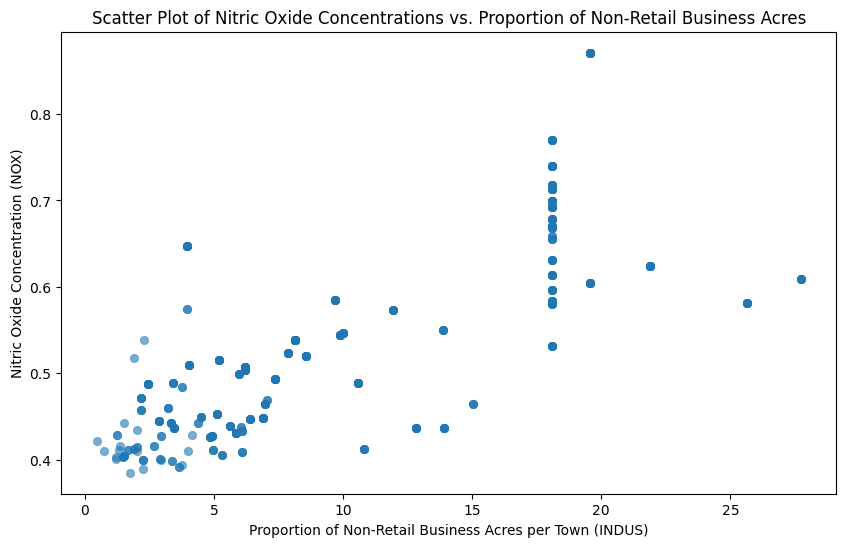

In [15]:
# Create a scatter plot
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.6, edgecolor=None)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()


Some trend?.. It might indicate some correlation.

# the pupil to teacher ratio 

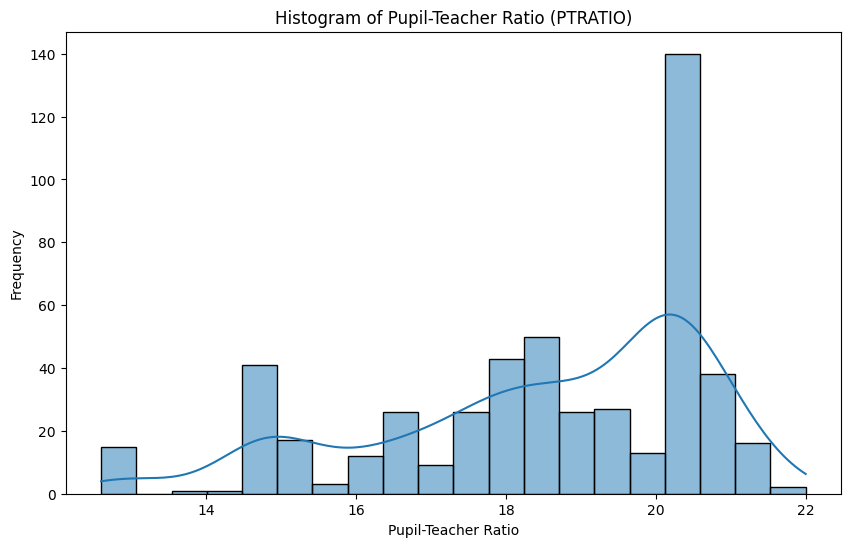

In [16]:
# Create a histogram for the 'PTRATIO' column
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()


# Questions

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [17]:
# H0: Median value - no significant difference between houses bounded by the Charles river.
# H1: Median value - has a significant difference between houses bounded by the Charles river.

# Separate the data into two groups based on the 'CHAS' variable
group_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the independent samples t-test
t_stat, p_value = scipy.stats.ttest_ind(group_chas_1, group_chas_0, equal_var=False)  # Use equal_var=False if variances are not assumed to be equal

# Print the test statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-statistic: 3.113291312794837
P-value: 0.003567170098137517


P < 0.05 => H0 rejected

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [18]:
# H0: no difference
# H1: is a difference

# Perform ANOVA
groups = [boston_df[boston_df['AGE_GROUP'] == group]['MEDV'] for group in boston_df['AGE_GROUP'].unique()]
f_stat, p_value = scipy.stats.f_oneway(*groups)

# Print the ANOVA results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


P < 0.5 => H0 rejected

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
# H0: no relationship
# H1: is a relationship

# Compute Pearson correlation coefficient and p-value
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")



Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


P < 0.5 => H0 rejected

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [20]:
# H0: no impact
# H1: is an impact

# Define the independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        14:36:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The coefficient for 'DIS' is 1.0916. This indicates that for every one unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes is expected to increase by approximately $1,092.
The analysis shows that there is a positive association between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes.
However, the distance to employment centers explains only a small portion of the variation in home values.